# Import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from PIL import Image
import os
sns.set_theme()
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.dpi"] = 300

In [2]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.dpi"] = 300

# Pull

In [3]:
# !git clone https://github.com/Tuan-Lee-23/Data-Science-Final-Project.git
# %cd Data-Science-Final-Project/
# %cd notebooks

Cloning into 'Data-Science-Final-Project'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 124 (delta 53), reused 90 (delta 25), pack-reused 0
Receiving objects: 100% (124/124), 73.28 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/Data-Science-Final-Project
/content/Data-Science-Final-Project/notebooks


# Preprocessing + Data exploration

In [4]:
%cd ..

/content/Data-Science-Final-Project


In [5]:
df = pd.read_csv('data/raw/tmdb.csv', index_col = 'id', lineterminator= '\n')
df.head(8)

adult belongs_to_collection  ...   revenue_     budget
id                                   ...                      
619297  False                   NaN  ...        NaN        NaN
602463  False                   NaN  ...  5423104.0  5423104.0
849361  False                   NaN  ...        NaN        NaN
517302  False                   NaN  ...        NaN  4010283.0
844069  False                   NaN  ...        NaN        NaN
760154  False                   NaN  ...        NaN        NaN
848144  False                   NaN  ...        NaN        NaN
736737  False                   NaN  ...        NaN     2194.0

[8 rows x 26 columns]

## Inspecting

In [6]:
print(df.shape)
pd.DataFrame(df.dtypes).sort_values(0)

(12199, 26)


0
adult                     bool
video                     bool
vote_count               int64
vote_average           float64
runtime                float64
revenue_               float64
popularity             float64
budget                 float64
original_title          object
keywords                object
crew                    object
cast                    object
belongs_to_collection   object
genres                  object
homepage                object
title                   object
tagline                 object
status                  object
spoken_languages        object
imdb_id                 object
original_language       object
production_countries    object
production_companies    object
poster_path             object
overview                object
release_date            object

### Check Duplication

In [7]:
df.index.duplicated().sum()

0

### Feature interpretation

## Basic cleaning

### Correct dtypes

Convert **release_date** from object to datetime

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

Let's check dtypes again

In [9]:
temp = pd.DataFrame({'type': df.dtypes}).sort_values(['type']).T
display(temp)

adult video vote_count  ... poster_path overview tagline
type  bool  bool      int64  ...      object   object  object

[1 rows x 26 columns]

$\Rightarrow$ All Features are in the correct dtypes

### Clean features have dictionary values

In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'keywords']

def clean_genres_dict(val, col):
    if pd.isna(val):
        return np.nan
    else:
        res = []
        items =  eval(str(val))
        if col == 'genres' or col == 'companies' or col == 'countries':
            res = [item['name'] for item in items]
        elif col == 'languages':
            res = [item['english_name'] for item in items]
        elif col == 'cast':
            res = [[item['original_name'], item['gender'], item['popularity'], item['character']] for item in items]
        elif col == 'crew':
            res = [[item['original_name'], item['gender'], item['popularity'], item['job']] for item in items]
        elif col == 'keywords':
            res = [item['name'] for item in items]


        return res


# def clean_production_companies(val):

df['genres'] =df['genres'].apply(lambda x: clean_genres_dict(x, 'genres'))
df['production_companies'] =df['production_companies'].apply(lambda x: clean_genres_dict(x, 'companies'))
df['production_countries'] =df['production_countries'].apply(lambda x: clean_genres_dict(x, 'countries'))
df['spoken_languages'] =df['spoken_languages'].apply(lambda x: clean_genres_dict(x, 'languages'))
df['cast'] =df['cast'].apply(lambda x: clean_genres_dict(x, 'cast'))
df['crew'] =df['crew'].apply(lambda x: clean_genres_dict(x, 'crew'))
df['keywords'] =df['keywords'].apply(lambda x: clean_genres_dict(x, 'keywords'))
df.head()

adult belongs_to_collection  ...   revenue_     budget
id                                   ...                      
619297  False                   NaN  ...        NaN        NaN
602463  False                   NaN  ...  5423104.0  5423104.0
849361  False                   NaN  ...        NaN        NaN
517302  False                   NaN  ...        NaN  4010283.0
844069  False                   NaN  ...        NaN        NaN

[5 rows x 26 columns]

## Explore movies (Just for fun)

#### Top 20 Highest-Grossing Movies of All Time'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


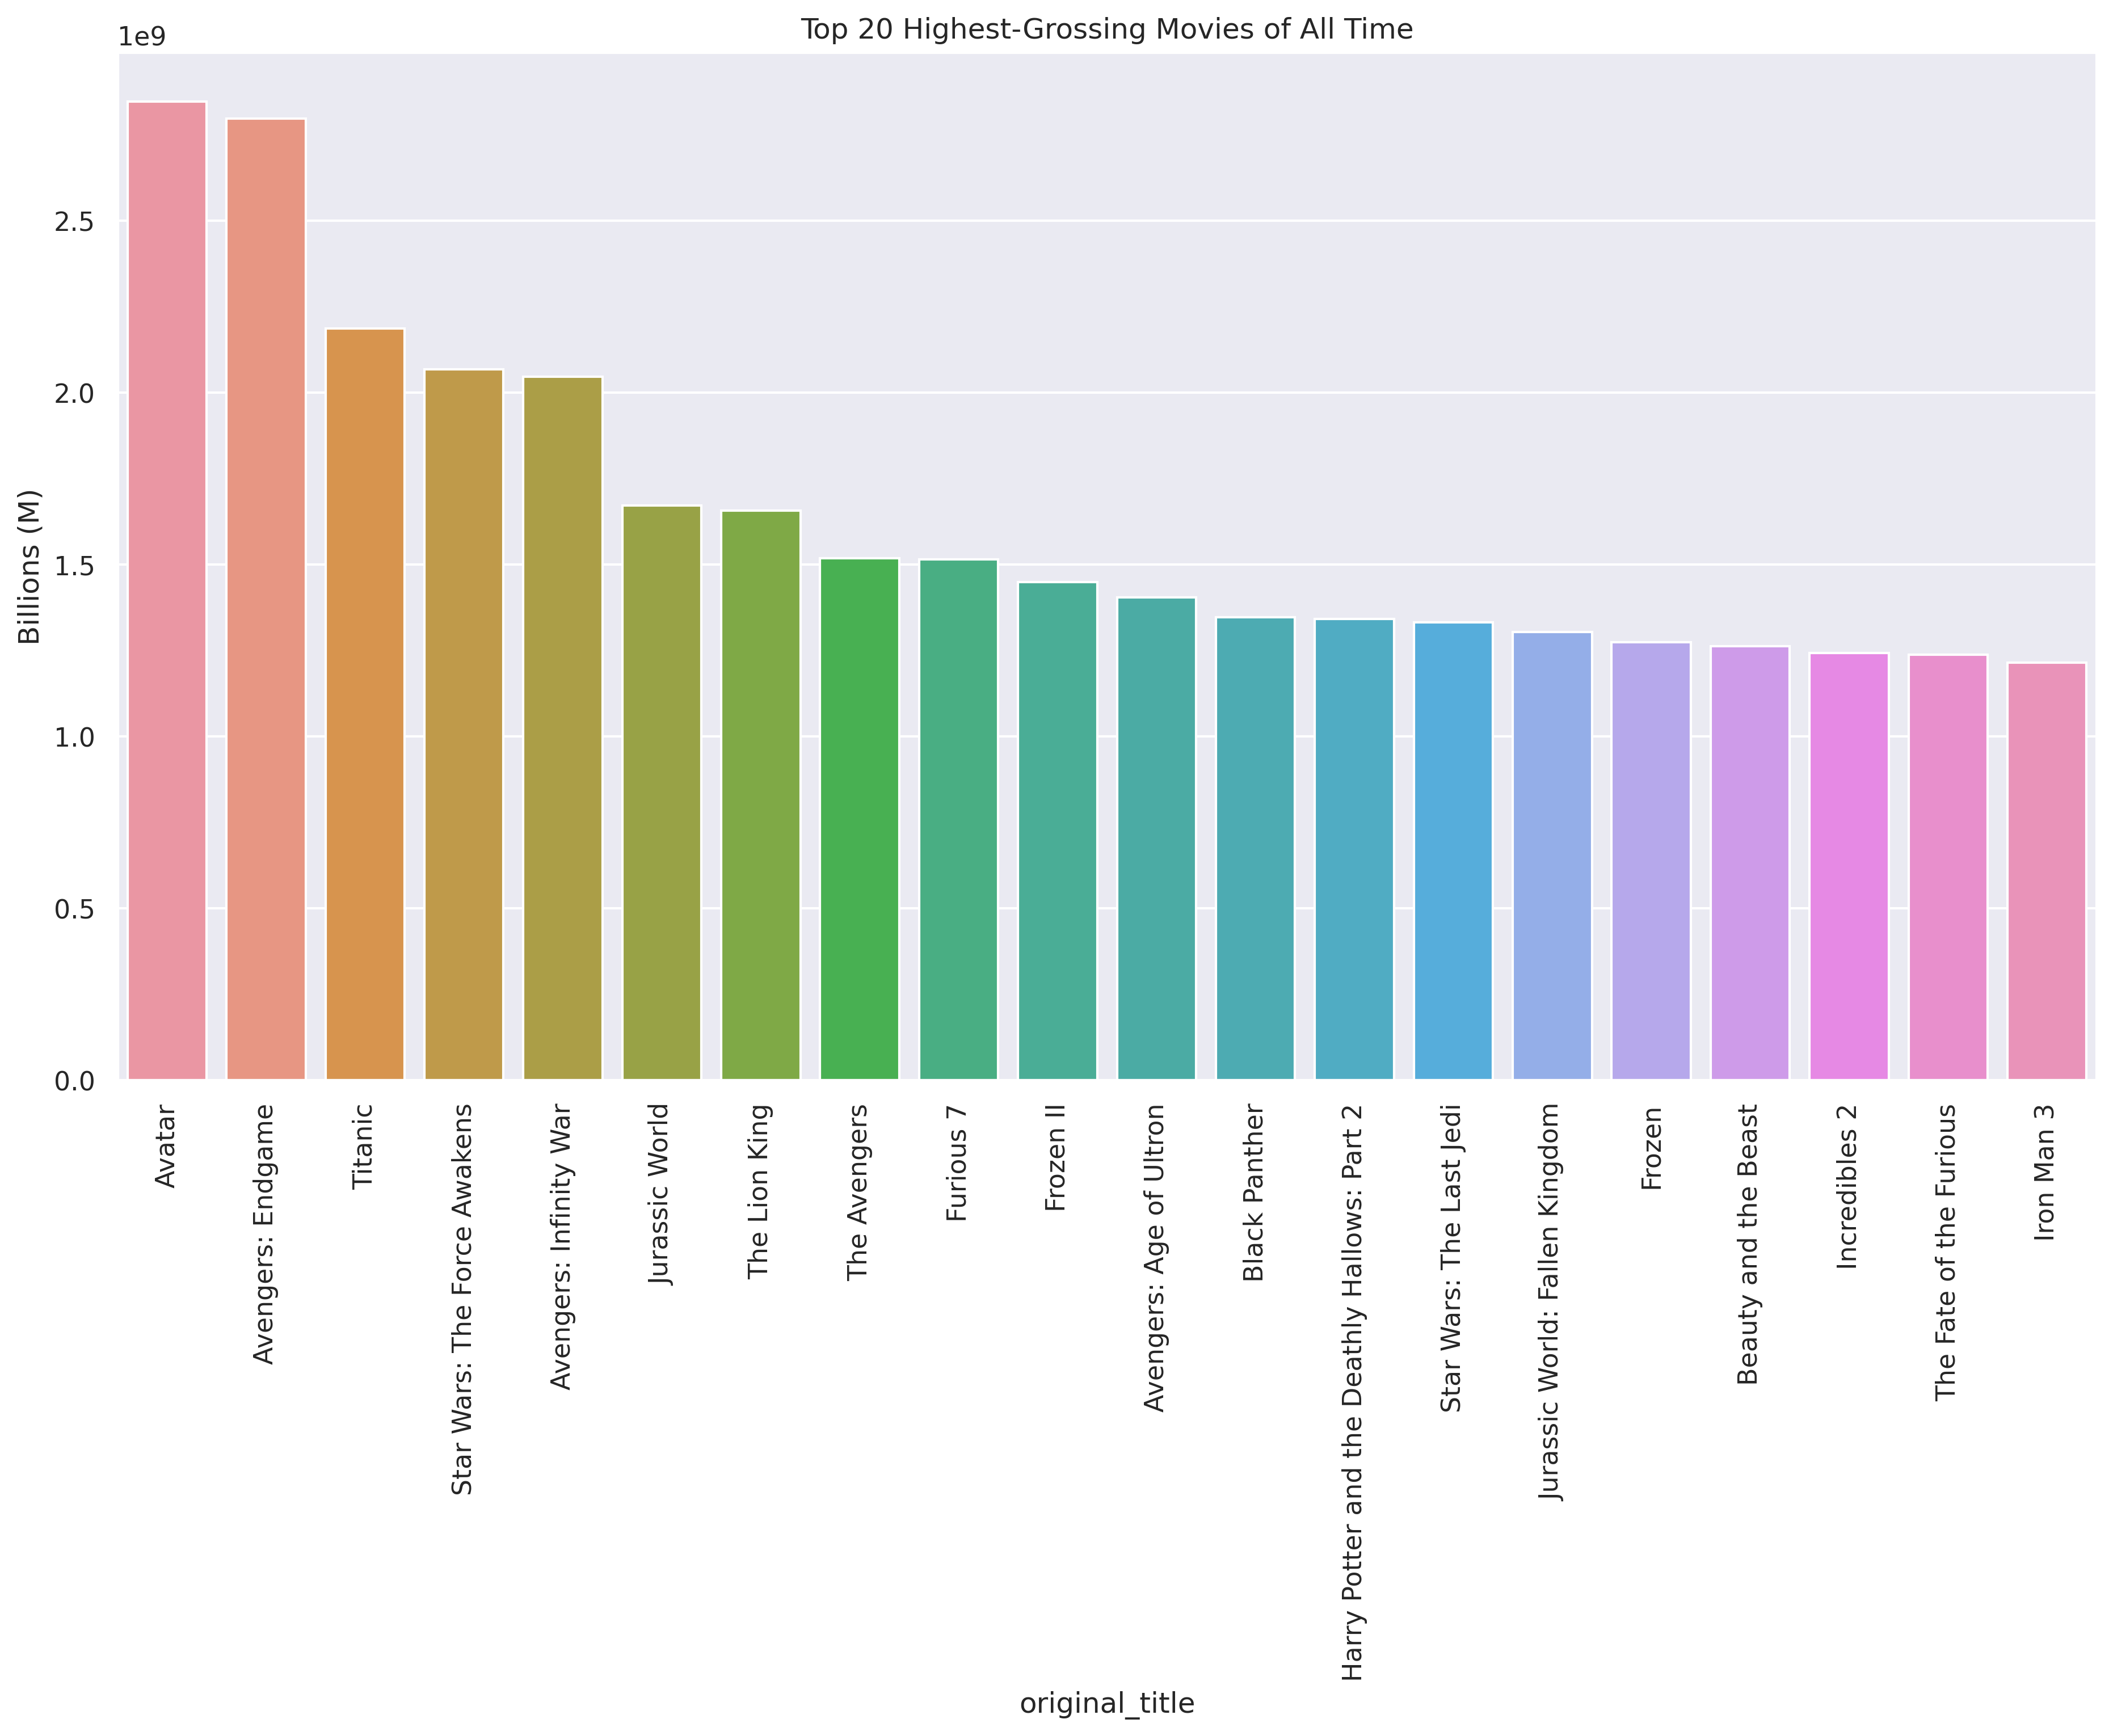

In [12]:
temp = df.sort_values('revenue_', ascending = False).head(20)
sns.barplot(temp.original_title, temp.revenue_)
plt.xticks(rotation = 90)
plt.ylabel('Billions (M)')
plt.title('Top 20 Highest-Grossing Movies of All Time')
plt.show()

#### Top 10 Most Expensive Movies Of All Time

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38713 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38713 missing from current font.
  font.set_text(s, 0, flags=flag

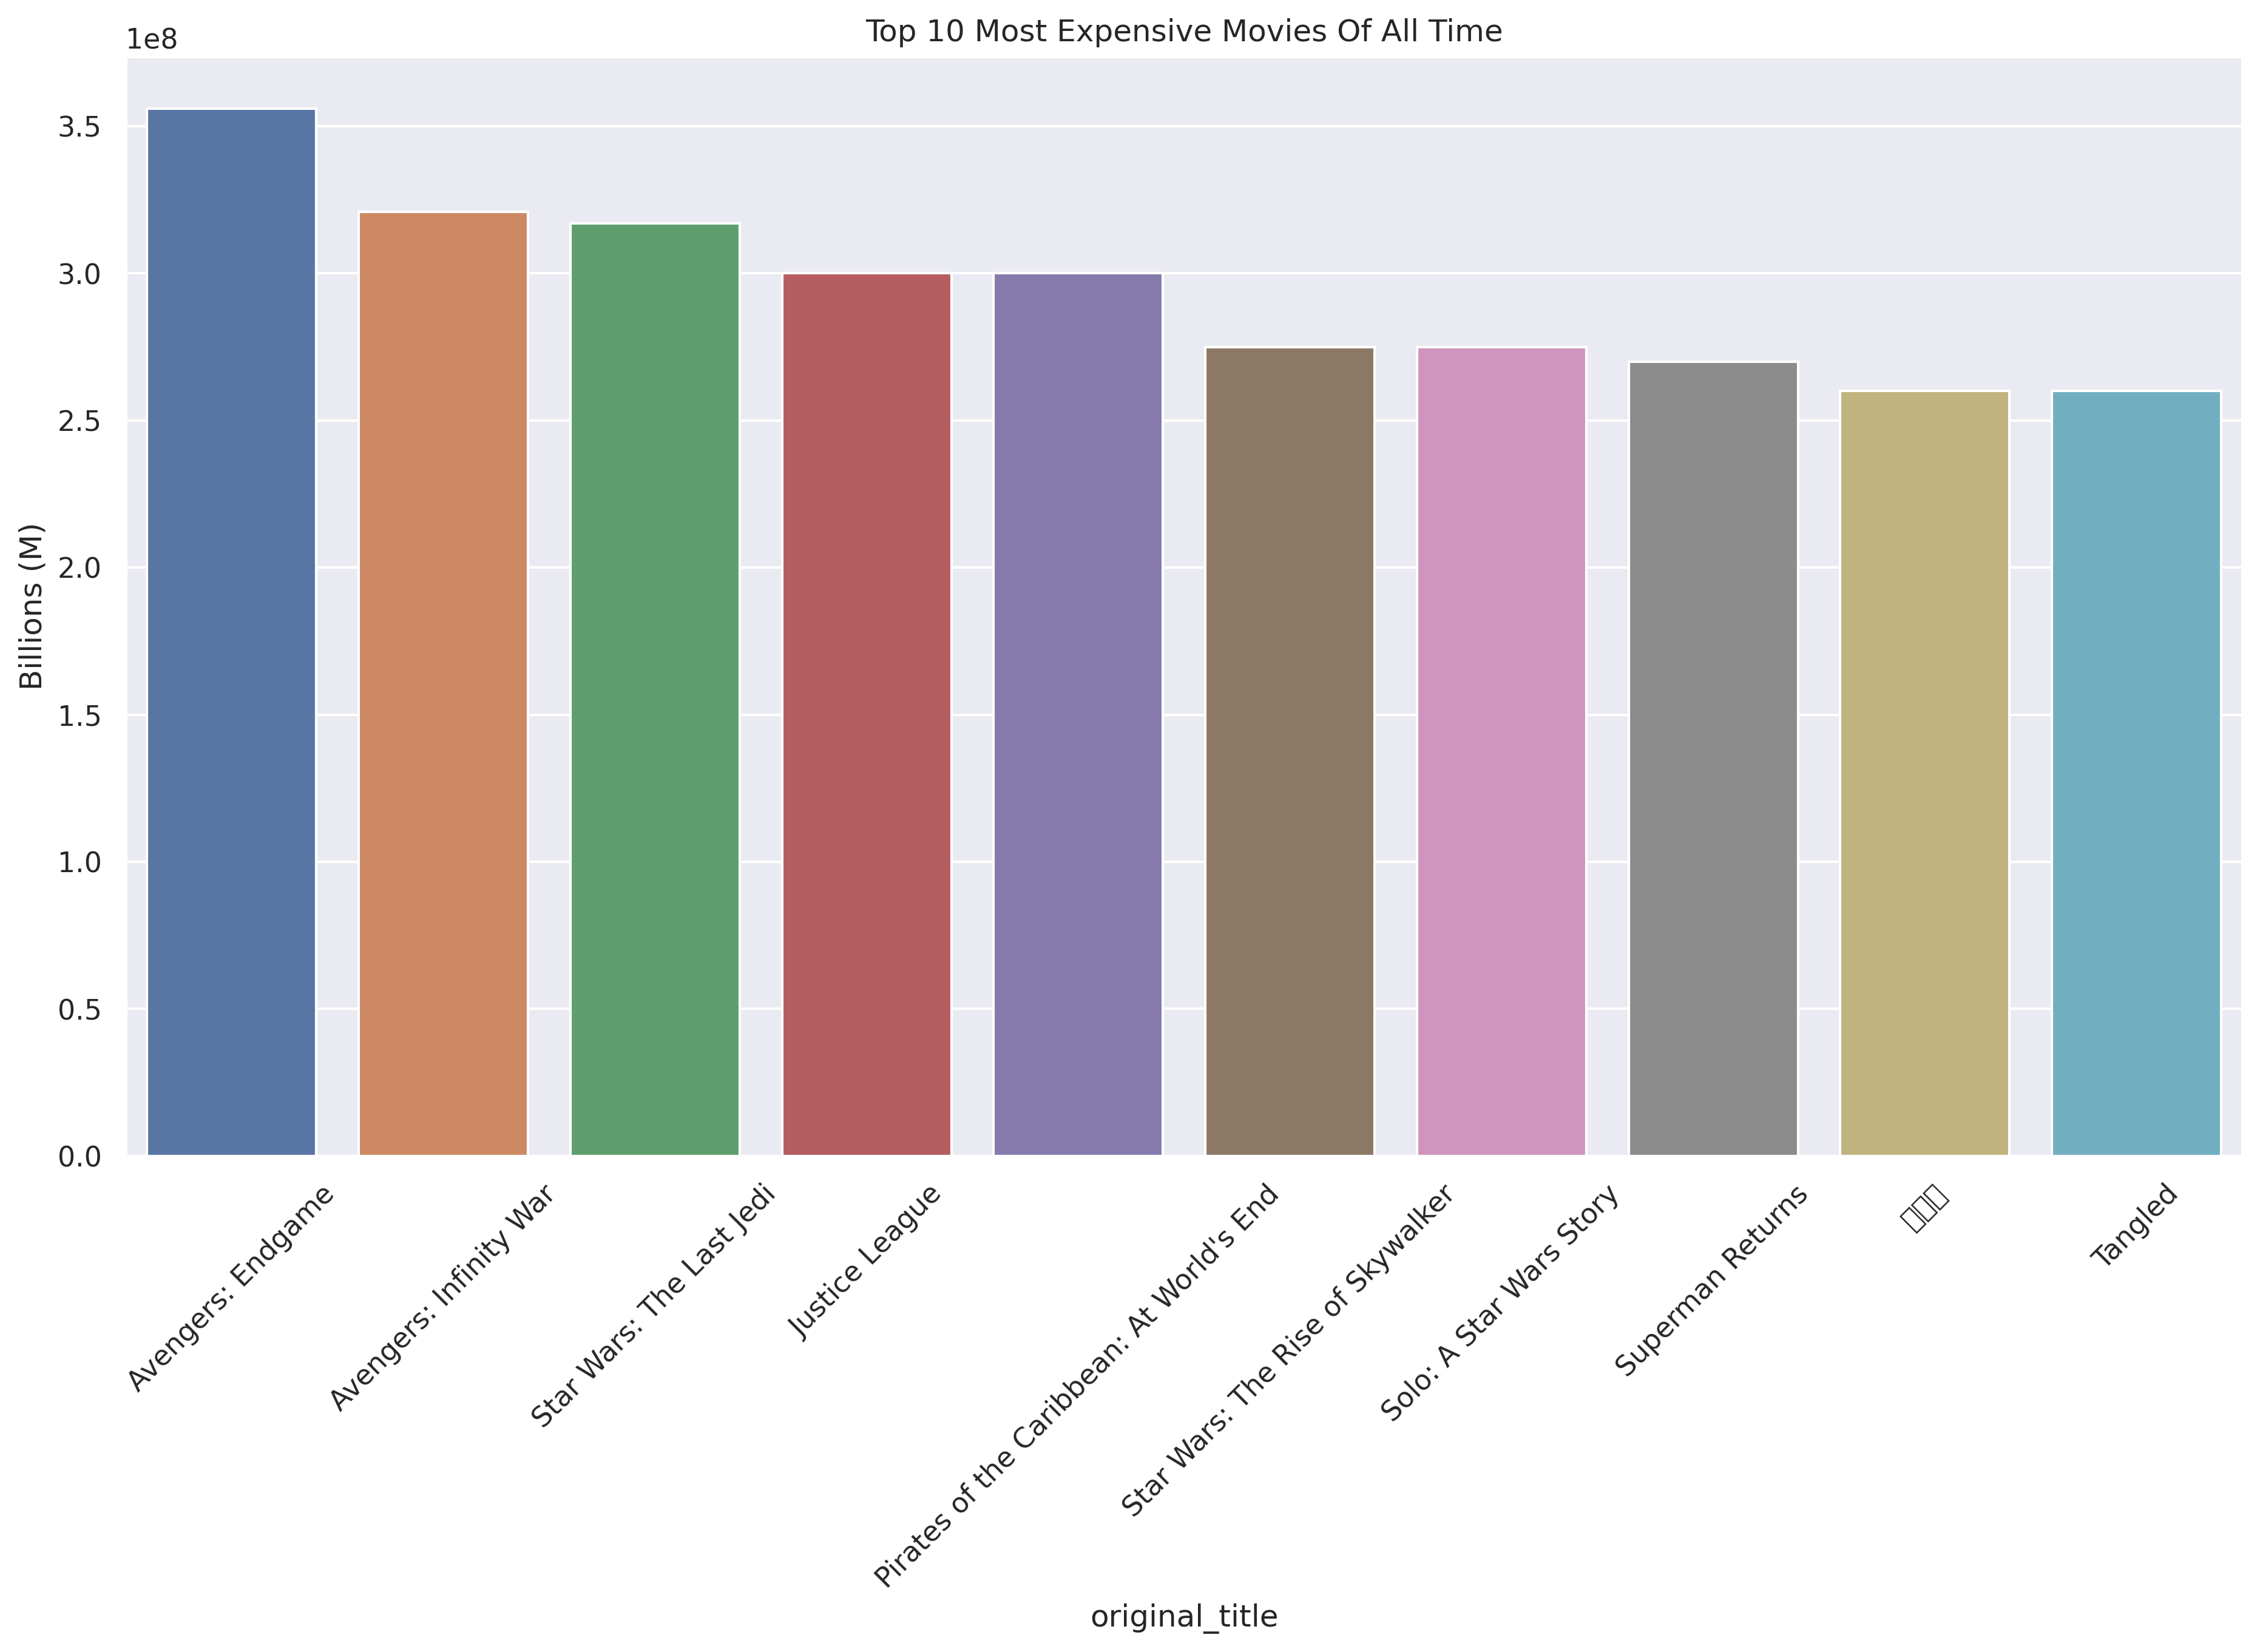

In [13]:
temp = df.sort_values('budget', ascending = False).head(10)
sns.barplot(temp.original_title, temp.budget)
plt.xticks(rotation = 45)
plt.ylabel('Billions (M)')
plt.title('Top 10 Most Expensive Movies Of All Time')
plt.show()

#### Top 20 Longest Movies of All Time'

In [14]:
temp = df.sort_values('runtime', ascending = False).head(20)
display(temp[['original_title', 'runtime']])

original_title  runtime
id                                                                             
45560                                            Berlin Alexanderplatz    902.0
222724  Crystal Lake Memories: The Complete History of Friday the 13th    400.0
11659                                               La meglio gioventù    366.0
3870                                                         Novecento    317.0
10655                                                       Gettysburg    271.0
8095                                                         Cleopatra    248.0
414419                              Kill Bill: The Whole Bloody Affair    247.0
791373                                    Zack Snyder's Justice League    242.0
10549                                                           Hamlet    242.0
37757                         Never Sleep Again: The Elm Street Legacy    240.0
19496                                               Salem Witch Trials    240.0
12627                                                La Belle Noiseuse    238.0
28422                                                           愛のむきだし    237.0
770                                                 Gone with the Wind    233.0
311                                        Once Upon a Time in America    229.0
947                                                 Lawrence of Arabia    227.0
9459                                                         Woodstock    225.0
19666                                                             लगान    224.0
665                                                            Ben-Hur    222.0
6844                                              The Ten Commandments    220.0

#### Top 20 Highest-Rating Movies of All Time'

In [15]:
temp = df.sort_values('vote_average', ascending = False).head(20)
display(temp[['original_title', 'vote_average']])

original_title  vote_average
id                                                         
786568               Toy Story 3 in Real Life          10.0
849591                Halo: The Fall of Reach           9.5
329824                          Ebola Zombies           9.5
739936                          French Lolita           9.3
820232                              鬼滅の刃 兄妹の絆           9.3
730647                      브레이크 더 사일런스: 더 무비           9.2
529414      Franco Escamilla: Por La Anécdota           9.2
657847             Mr. Robot: Behind the Mask           9.1
753230  Las tres muertes de Marisela Escobedo           9.0
105825                              聊齋三集之燈草和尚           9.0
667257                       Cosas imposibles           9.0
717280                                The Act           9.0
732439                     The End of Pokémon           9.0
284866                         Sonic Prologue           8.9
652837                              ジョゼと虎と魚たち           8.9
568300                           러브 유어셀프 인 서울           8.9
632632                                 映画 ギヴン           8.8
278698                         Avatar Spirits           8.8
19404            दिलवाले दुल्हनिया ले जायेंगे           8.8
283566                      シン・エヴァンゲリオン劇場版:||           8.8

#### Top 10 Trending Movies of (August 2021)'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


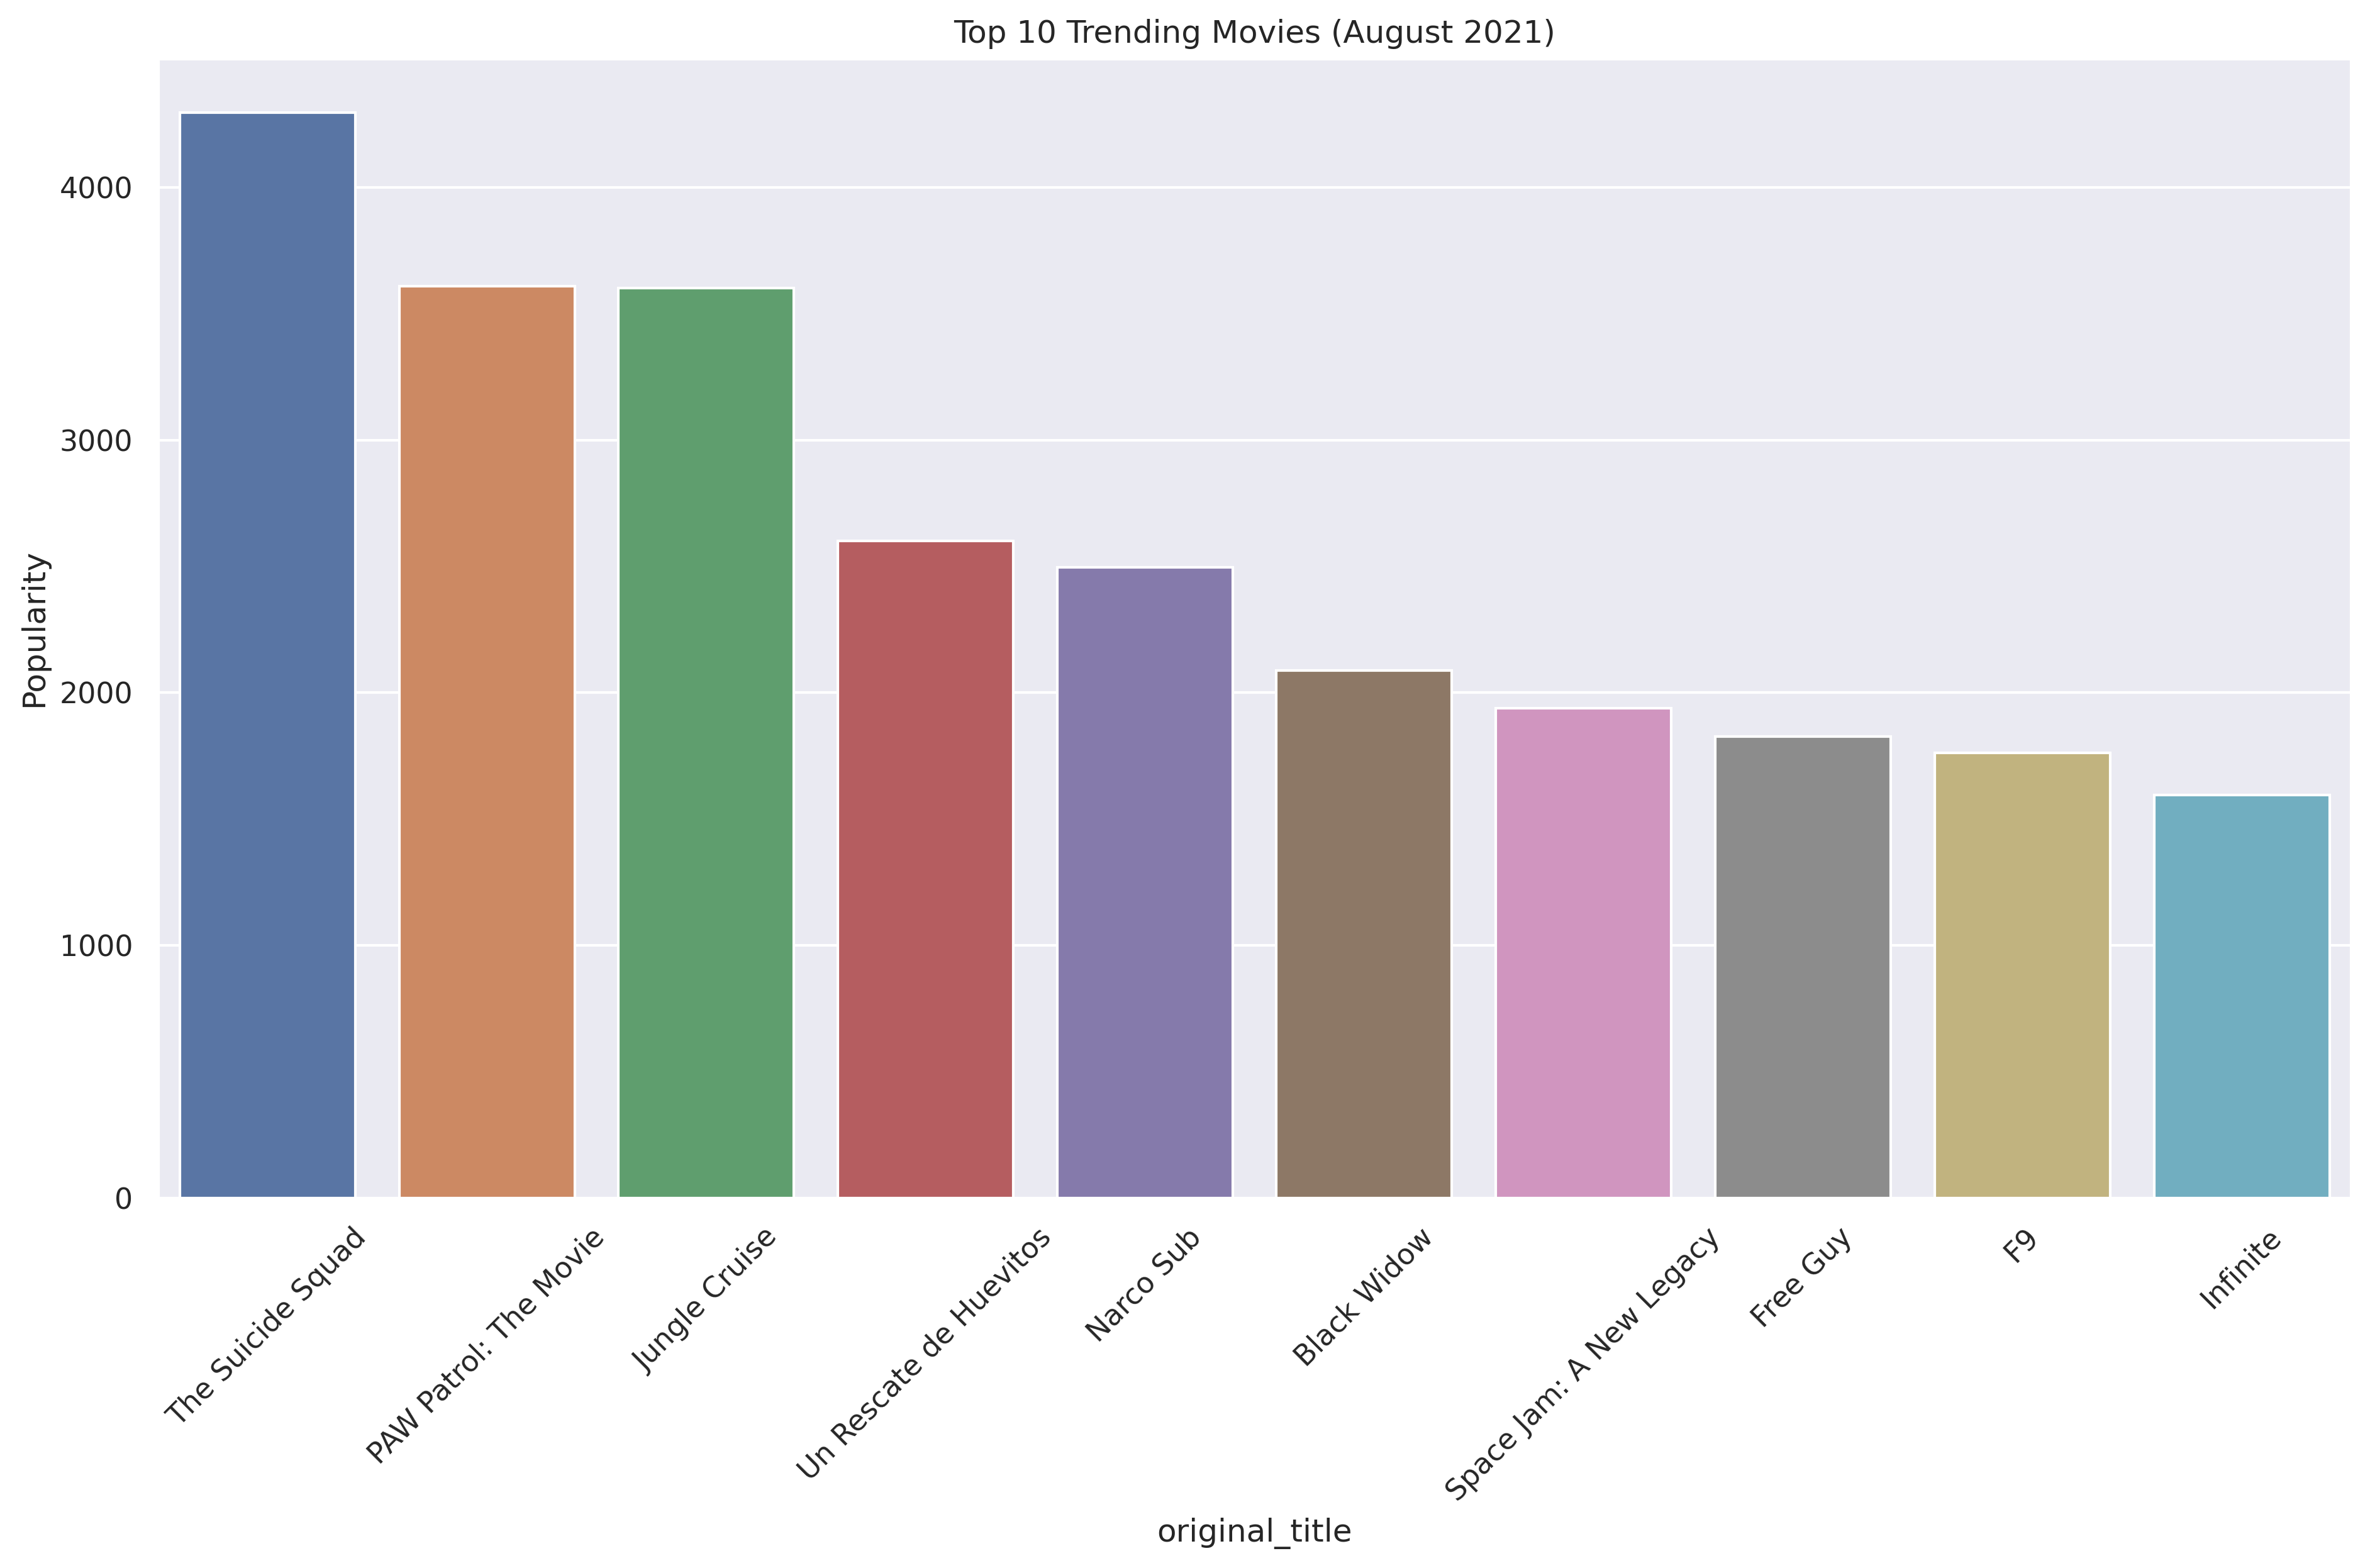

In [16]:
temp = df.sort_values('popularity', ascending = False).head(10)
sns.barplot(temp.original_title, temp.popularity)
plt.xticks(rotation = 45)
plt.ylabel('Popularity')
plt.title('Top 10 Trending Movies (August 2021)')
plt.show()

#### Top 5 Oldest Movies (From database)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


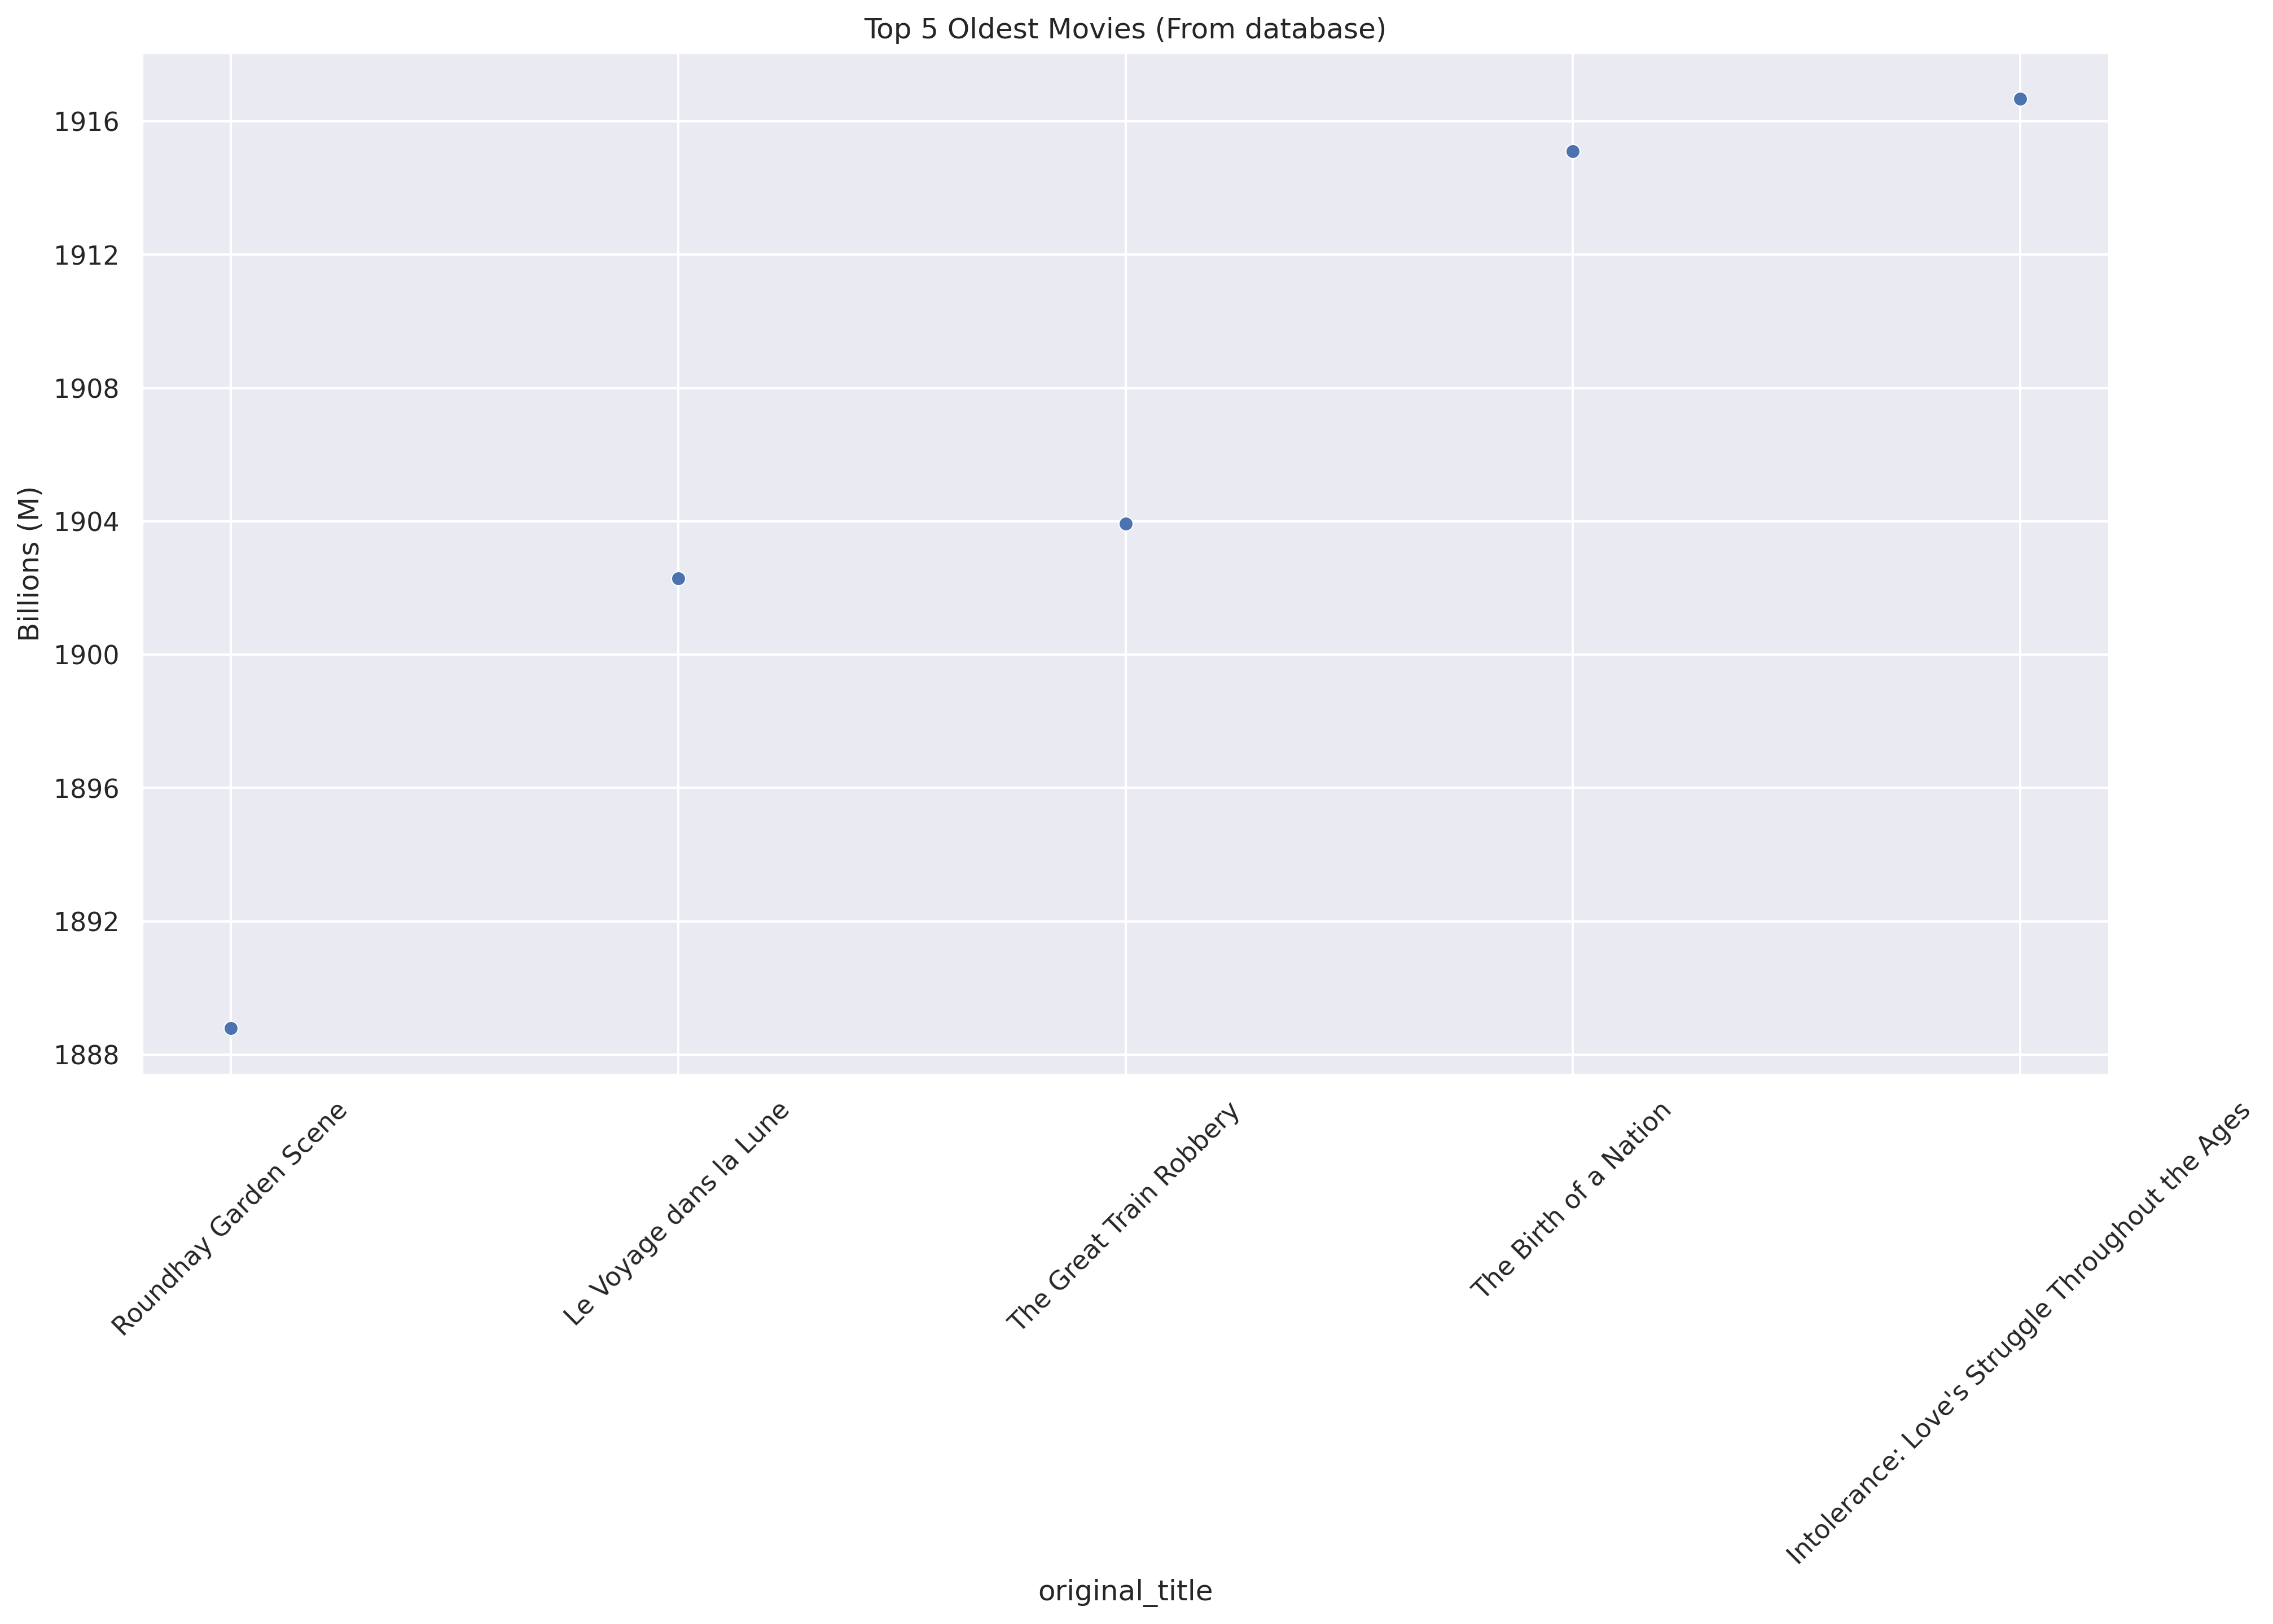

In [17]:
temp = df.sort_values('release_date').head(5)
sns.scatterplot(temp.original_title, temp.release_date)
plt.xticks(rotation = 45)
plt.ylabel('Billions (M)')
plt.title('Top 5 Oldest Movies (From database)')
plt.show()

#### The 10 Highest Grossing Actors of All-Time

In [18]:
temp = df[['cast', 'vote_average', 'budget', 'revenue_']]
temp = temp.dropna(subset = ['vote_average', 'budget', 'revenue_'])
temp = temp.explode('cast')

def treat_cast(val):
    try:
        return val[0]
    except:
        return np.nan

def treat_cast1(val):
    try:
        return val[1]
    except:
        return np.nan

def treat_cast2(val):
    try:
        return val[2]
    except:
        return np.nan

def treat_cast3(val):
    try:
        return val[3]
    except:
        return np.nan

def display_cast(name):
    global count
    url = 'https://vi.wikipedia.org/wiki/' + "_".join(name.split())
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # img_link = soup.select('#mw-content-text > div.mw-parser-output > table.infobox.biography.vcard > tbody > tr:nth-of-type(2) > td > a > img')[0]['src']
    img_link = soup.find('img')['src']
    response = requests.get(f'https:{img_link}')

    # importing modules
    import urllib.request
    import matplotlib.image as mpimg
    
    urllib.request.urlretrieve(f"https:{img_link}", "img.jpg")
    img = mpimg.imread('img.jpg')
    plt.figure(figsize = (5, 3))
    plt.gcf().set_dpi(100)
    imgplot = plt.imshow(img)

    plt.axis('off')
    plt.title(name)
    plt.show()

temp['name'] = temp['cast'].apply(treat_cast)
temp['gender'] = temp['cast'].apply(treat_cast1)
temp['popularity'] = temp['cast'].apply(treat_cast2)
temp['character'] = temp['cast'].apply(treat_cast3)
temp = temp.dropna()


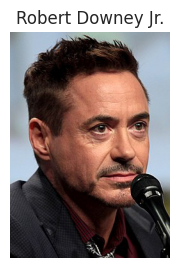

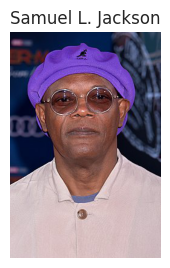

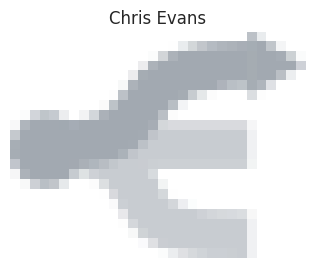

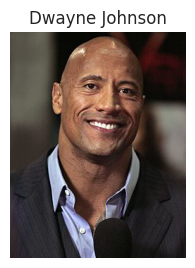

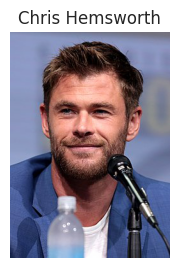

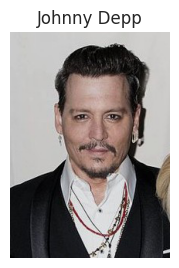

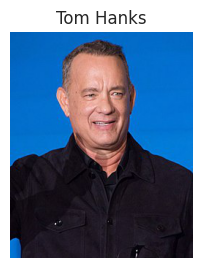

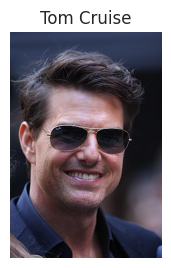

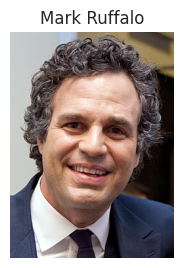

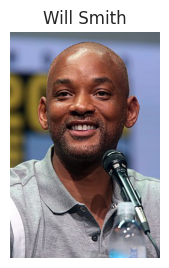

name      revenue_
0  Robert Downey Jr.  1.459505e+10
1  Samuel L. Jackson  1.167806e+10
2        Chris Evans  1.156526e+10
3     Dwayne Johnson  1.137446e+10
4    Chris Hemsworth  1.116755e+10
5        Johnny Depp  1.066610e+10
6          Tom Hanks  1.064165e+10
7         Tom Cruise  1.049898e+10
8       Mark Ruffalo  9.836924e+09
9         Will Smith  9.477434e+09

In [19]:
gender = 2
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_cast_df = top_cast_df.reset_index()
_ = top_cast_df.name.apply(display_cast)
display(top_cast_df)


#### The 10 Highest Grossing Actress of All-Time

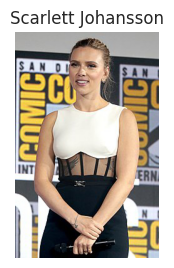

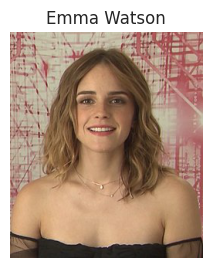

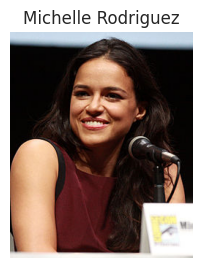

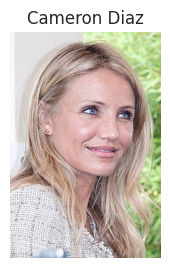

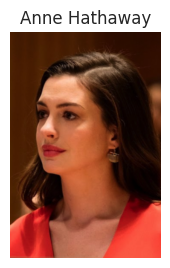

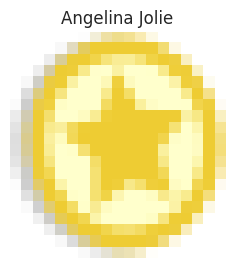

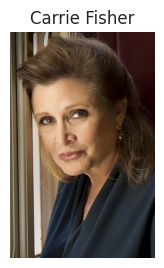

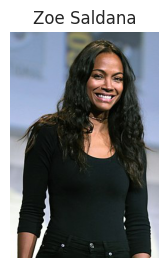

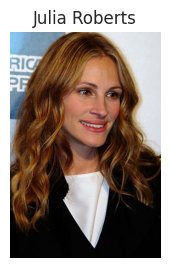

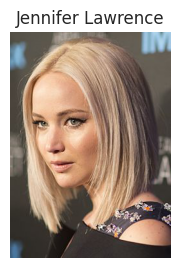

name      revenue_
0  Scarlett Johansson  1.469975e+10
1         Emma Watson  9.730922e+09
2  Michelle Rodriguez  8.308009e+09
3        Cameron Diaz  7.064622e+09
4       Anne Hathaway  6.754784e+09
5      Angelina Jolie  6.526952e+09
6       Carrie Fisher  6.526804e+09
7         Zoe Saldana  6.204332e+09
8       Julia Roberts  5.983636e+09
9   Jennifer Lawrence  5.750903e+09

In [20]:
gender = 1
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_cast_df = top_cast_df.reset_index()
_ = top_cast_df.name.apply(display_cast)
display(top_cast_df)


#### Top 10 blockbuster actors

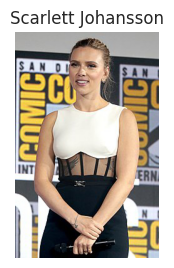

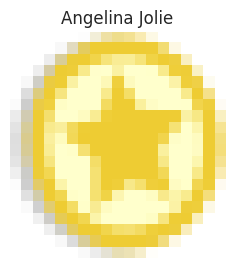

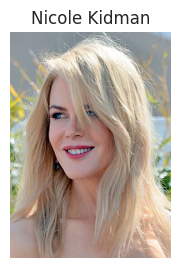

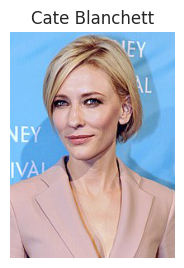

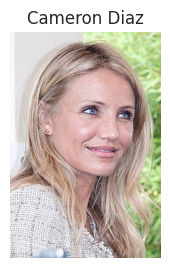

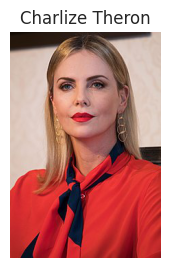

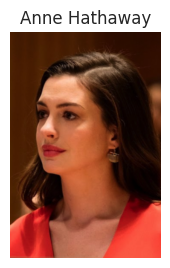

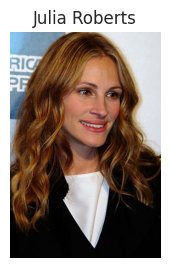

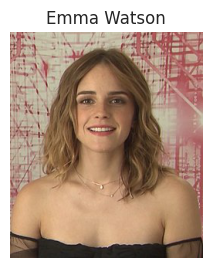

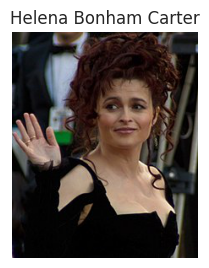

name        budget
0    Scarlett Johansson  3.175564e+09
1        Angelina Jolie  2.461532e+09
2         Nicole Kidman  2.116388e+09
3        Cate Blanchett  1.977410e+09
4          Cameron Diaz  1.843081e+09
5       Charlize Theron  1.807146e+09
6         Anne Hathaway  1.689680e+09
7         Julia Roberts  1.678500e+09
8           Emma Watson  1.674466e+09
9  Helena Bonham Carter  1.614385e+09

In [21]:
gender = 1
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['budget'].sum().sort_values(ascending = False)).head(10)

top_cast_df = top_cast_df.reset_index()

top_cast_df.name.apply(display_cast)
display(top_cast_df)

#### Top 10 blockbuster actress

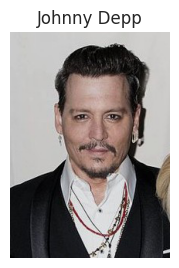

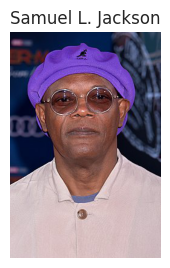

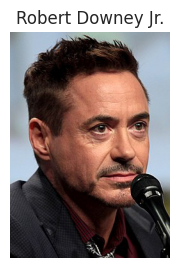

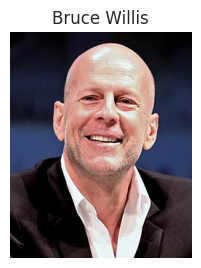

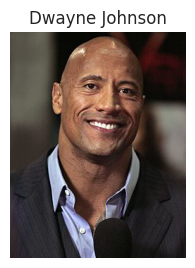

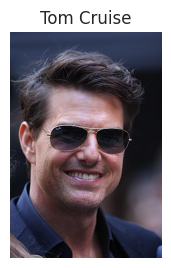

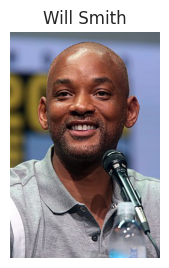

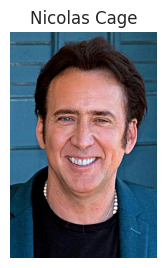

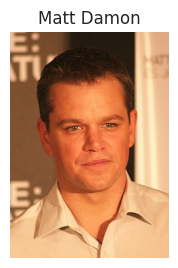

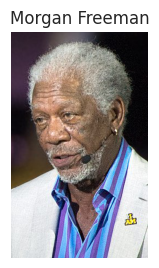

name        budget
0        Johnny Depp  3.695231e+09
1  Samuel L. Jackson  3.506664e+09
2  Robert Downey Jr.  3.291473e+09
3       Bruce Willis  2.966526e+09
4     Dwayne Johnson  2.932000e+09
5         Tom Cruise  2.869500e+09
6         Will Smith  2.772100e+09
7       Nicolas Cage  2.671199e+09
8         Matt Damon  2.648587e+09
9     Morgan Freeman  2.617178e+09

In [22]:
gender = 2
top_cast_df = temp[temp['gender'] == gender]
top_cast_df = pd.DataFrame(top_cast_df.groupby(['name'])['budget'].sum().sort_values(ascending = False)).head(10)

top_cast_df = top_cast_df.reset_index()

top_cast_df.name.apply(display_cast)
display(top_cast_df)

#### Top 10 characters actors of all time

In [23]:
top_chars = pd.DataFrame(temp.groupby(['name', 'character'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_chars = top_chars.reset_index()

top_chars['name'] =  + top_chars['character'] + ' - ' + top_chars['name']
display(top_chars[['name', 'revenue_']])


name      revenue_
0            Tony Stark / Iron Man - Robert Downey Jr.  1.222564e+10
1         Steve Rogers / Captain America - Chris Evans  1.000689e+10
2  Natasha Romanoff / Black Widow - Scarlett Johansson  1.000613e+10
3                       Thor Odinson - Chris Hemsworth  9.716135e+09
4                           Ron Weasley - Rupert Grint  7.706879e+09
5                       Hermione Granger - Emma Watson  7.706879e+09
6                      Harry Potter - Daniel Radcliffe  7.706879e+09
7                               Gandalf - Ian McKellen  5.852068e+09
8                         Dominic Toretto - Vin Diesel  5.435489e+09
9                         Luke Skywalker - Mark Hamill  5.028866e+09

#### Top 10 characters (highest revenue) of all time

In [24]:
top_chars = temp[temp['gender'] == 1]
top_chars = pd.DataFrame(top_chars.groupby(['character'])['revenue_'].sum().sort_values(ascending = False)).head(10)
top_chars = top_chars.reset_index()

display(top_chars)

character      revenue_
0  Natasha Romanoff / Black Widow  1.000613e+10
1                Hermione Granger  7.706879e+09
2             General Leia Organa  4.474908e+09
3                             Rey  4.474908e+09
4                      May Parker  3.617570e+09
5                      Bella Swan  3.343107e+09
6                       Lois Lane  3.186663e+09
7                  Claire Dearing  2.975173e+09
8          Princess Fiona (voice)  2.968173e+09
9                Katniss Everdeen  2.944163e+09

#### The 20 Highest Grossing Director - Screenplay of All-Time

In [25]:
temp = df[['crew', 'vote_average', 'budget', 'revenue_']]
temp = temp.dropna(subset = ['vote_average', 'budget', 'revenue_'])
temp = temp.explode('crew')


temp['name'] = temp['crew'].apply(treat_cast)
temp['gender'] = temp['crew'].apply(treat_cast1)
temp['popularity'] = temp['crew'].apply(treat_cast2)
temp['job'] = temp['crew'].apply(treat_cast3)
temp = temp.dropna()

In [26]:
top_chars = pd.DataFrame(temp.groupby(['name', 'job'])['revenue_'].sum().sort_values(ascending = False)).head(20)
top_chars = top_chars.reset_index()

display(top_chars)

name                      job      revenue_
0     Steven Spielberg                 Director  1.045067e+10
1      Stephen McFeely               Screenplay  9.394915e+09
2   Christopher Markus               Screenplay  9.394915e+09
3        Andrew Lesnie  Director of Photography  8.619159e+09
4       Dariusz Wolski  Director of Photography  7.680814e+09
5         Steve Kloves               Screenplay  7.578452e+09
6     John Schwartzman  Director of Photography  7.332944e+09
7        Trent Opaloch  Director of Photography  7.313463e+09
8          Don Burgess  Director of Photography  6.992217e+09
9        Anthony Russo                 Director  6.842534e+09
10           Joe Russo                 Director  6.842534e+09
11       Peter Jackson                 Director  6.540704e+09
12   Stephen F. Windon  Director of Photography  6.472048e+09
13         Michael Bay                 Director  6.451729e+09
14          Dan Mindel  Director of Photography  6.392737e+09
15     Janusz Kamiński  Director of Photography  6.353249e+09
16       James Cameron                 Director  6.285280e+09
17           Bill Pope  Director of Photography  6.104071e+09
18         Dean Semler  Director of Photography  6.100220e+09
19          Fran Walsh               Screenplay  6.062013e+09

## EDA + Cleaning + Features engineering

### Split dataset (train, valid, test - 50 - 20 - 30)

### Inspection

#### Missing values exploration

#### Outliers

#### Explore numerical features

##### Univariate distribution

##### Bivariate distribution

##### Multivariate relationship

#### Explore categorical features

##### Distribution

##### Relationship

#### Combine Numerical + categorical features

### Cleaning + Feature engineering

##### Handling missing values

#### Handling outliers

#### Generate new features

#### Scaling features

#### Normalization

#### Categorical --> Numerical

#### Features selection

#### Cleaning Pipelines

# Model selection

# Hyperparameters tuning

# Evaluation

# References

- Cleaning steps https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
- EDA + features engineering:
    - https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat
    - https://www.kaggle.com/enric1296/complete-guide-eda-feat-model
    - https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation#Modelling-and-feature-generation
    - https://www.kaggle.com/takedown/tmdb-box-office-revenue-prediction